In [45]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [38]:
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad = True)
        self.b  = torch.rand([1], requires_grad = True)
        self.lr = torch.tensor(0.001)
    def forward(self, x):
        return self.w*x + self.b
    def update(self):
        self.w -=self.lr*self.w.grad
        self.b -= self.lr*self.b.grad
    def reset(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

In [39]:
def losse(y,p):
    return(y-p)**2

In [40]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])

In [41]:
model = RegressionModel()
losses = []
for epochs in range(100):
    loss = 0.0
    for i in range(len(x)):
        loss += losse(y[i], model.forward(x[i]))
    loss/=len(x)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        model.update()
    model.reset()
    

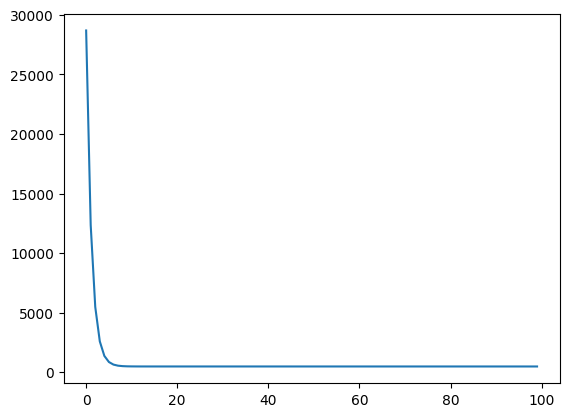

In [42]:
plt.plot(losses)

In [53]:
from torch.utils.data import Dataset, DataLoader
class regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand([1], requires_grad = True))
        self.b = nn.Parameter(torch.rand([1], requires_grad = True))
    def forward(self, x):
        return self.w*x + self.b
class dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

d = dataset(x,y)
dl = DataLoader(d, batch_size=4, shuffle = True)
for data in iter(dl):
    print(data)

loss_fn = torch.nn.MSELoss()
model = regression()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)
for epochs in range(100):
    loss = 0.0
    for i,d in enumerate(dl):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()
    finalloss = loss/len(dl)*4

print(finalloss)


[tensor([16.,  7., 20.,  5.]), tensor([210., 120., 240.,  40.])]
[tensor([12.]), tensor([180.])]
tensor(0., grad_fn=<MulBackward0>)


In [55]:
import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)
        
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10==0:
        print("After {} epochs, loss ={}".format(epochs,loss.item()))

After 0 epochs, loss =271.77264404296875
After 10 epochs, loss =9.994739684771048e-07
After 20 epochs, loss =3.1634598911776945e-13
After 30 epochs, loss =3.954324660684211e-13
After 40 epochs, loss =3.954324660684211e-13
After 50 epochs, loss =3.954324660684211e-13
After 60 epochs, loss =3.954324660684211e-13
After 70 epochs, loss =3.954324660684211e-13
After 80 epochs, loss =3.954324660684211e-13
After 90 epochs, loss =3.954324660684211e-13


In [56]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

[tensor([3, 4]), tensor([8, 5]), tensor([-3.5000,  3.5000])]
[tensor([6, 2]), tensor([3, 1]), tensor([11.5000,  5.7000])]
[tensor([5]), tensor([7]), tensor([2.5000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.4716], requires_grad=True),b=Parameter containing:
tensor([0.7832], requires_grad=True), and loss =Parameter containing:
tensor([0.1754], requires_grad=True)
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.6610], requires_grad=True),b=Parameter containing:
tensor([0.0967], requires_grad=True), and loss =Parameter containing:
tensor([0.1836], requires_grad=True)
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.9859], requires_grad=True),b=Parameter containing:
tensor([-0.2152], requires_grad=True), and loss =Parameter containing:
tensor([0.2360], requires_grad=True)
After 30 epochs, The parameters are w=Parameter containing:
tensor([1.3037], requires_grad=True),b=Parameter containing:
tensor([-0.4092], requires_g

In [57]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

After 0 epochs, The parameters are w=Parameter containing:
tensor([0.3910], requires_grad=True),b=Parameter containing:
tensor([0.9222], requires_grad=True), and loss =0.0
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.0302], requires_grad=True),b=Parameter containing:
tensor([0.8809], requires_grad=True), and loss =0.05120357125997543
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.0307], requires_grad=True),b=Parameter containing:
tensor([0.8503], requires_grad=True), and loss =0.05046183615922928
After 30 epochs, The parameters are w=Parameter containing:
tensor([0.0311], requires_grad=True),b=Parameter containing:
tensor([0.8200], requires_grad=True), and loss =0.04967478662729263
After 40 epochs, The parameters are w=Parameter containing:
tensor([0.0315], requires_grad=True),b=Parameter containing:
tensor([0.7899], requires_grad=True), and loss =0.048899900168180466
After 50 epochs, The parameters are w=Parameter containing:
tensor([0.0